In [ ]:
from google.colab import files
uploaded = files.upload()


Saving India_Exchange_Rate_Dataset(1).xls to India_Exchange_Rate_Dataset(1).xls


In [ ]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['India_Exchange_Rate_Dataset(1).xls']))
print(df)

    observation_date   EXINUS
0         1973-01-01   8.0041
1         1973-02-01   7.7538
2         1973-03-01   7.5465
3         1973-04-01   7.5462
4         1973-05-01   7.4927
..               ...      ...
558       2019-07-01  68.7391
559       2019-08-01  71.1891
560       2019-09-01  71.3110
561       2019-10-01  71.0086
562       2019-11-01  71.4942

[563 rows x 2 columns]


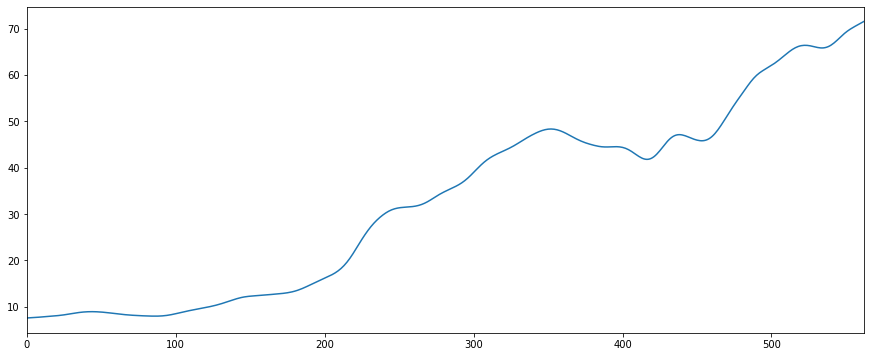

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)



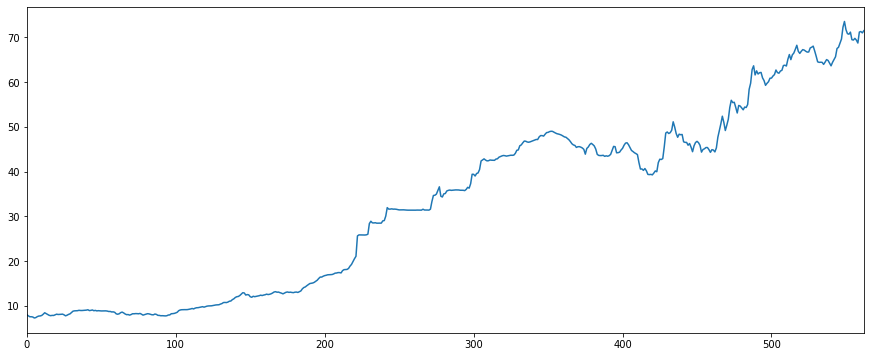

In [ ]:
df['EXINUS'].plot(figsize=(15,6)).autoscale(axis='x',tight=True)

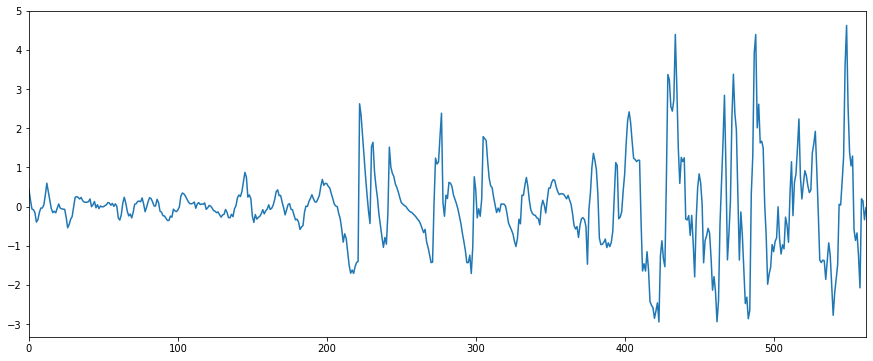

In [ ]:
EXINUS_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

In [ ]:
import statsmodels.api as sm
import pandas as pd
dta = sm.datasets.macrodata.load_pandas().data
index = pd.period_range('1959Q1', '2009Q3', freq='Q')
dta.set_index(index, inplace=True)

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)
gdp_decomp = dta[['realgdp']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

<ipython-input-12-5c2987d41197>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
<ipython-input-12-5c2987d41197>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


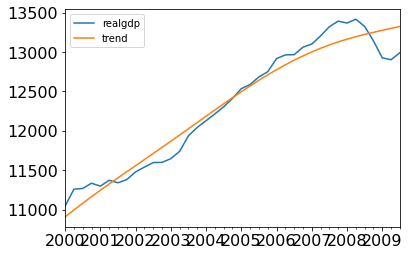

In [ ]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax,
...                                                      fontsize=16)
>>> plt.show()

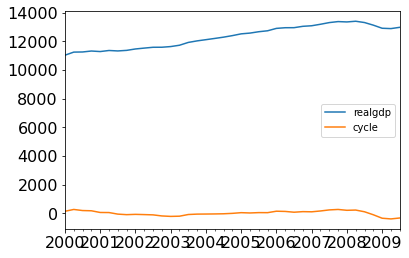

In [ ]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> gdp_decomp[["realgdp", "cycle"]]["2000-03-31":].plot(ax=ax,
...                                                      fontsize=16)
>>> plt.show()

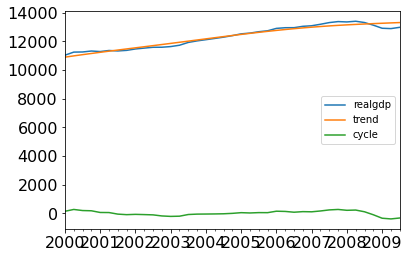

In [ ]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> gdp_decomp[["realgdp", "trend", "cycle"]]["2000-03-31":].plot(ax=ax,
...                                                      fontsize=16)
>>> plt.show()

In [ ]:
df['trend'] = EXINUS_trend

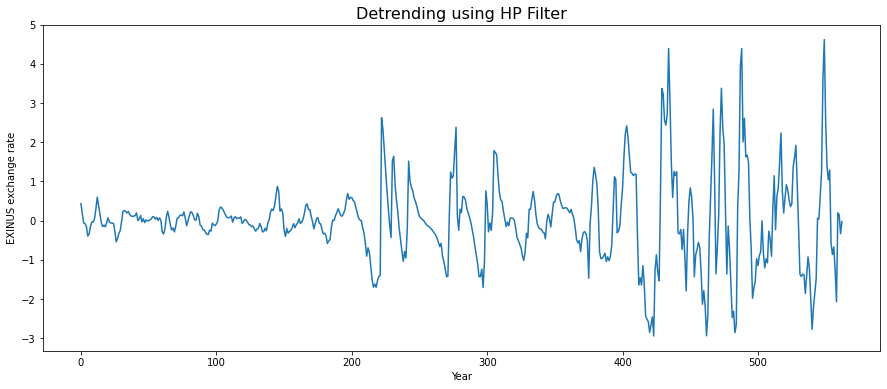

In [ ]:
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()